***
## Pymaceuticals Inc Trends
***

In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days.
Their physiological responses were then monitored over the course of that time. After the analysis of the data on four treatments (Capomulin, Infubinol, Ketapril, and Placebo), `the observable trends` are:

- On average, the only drug that __reduced the volume__ of tumors was __Capomulin__. The other treatments increased the volume from 18.7 to 23.3 mm3.


-  After the 45 days with __Capomulin__, on average, the mice had __56.1% less__ metatastic sites compared with the worst performing drug __Ketapril__ (1.47619 vs 3.363636 sites). During the first third of the treatment, the mice treated with Ketapril had less metatastic sites than those treated with the Placebo and Infubinol, then Ketapril only performed better than the Placebo, and in the final 5 days, the metatastic spread was higher for Ketapril.


- The mice treated with __Capomulin__ had a higher survival rate (__84%__), than those treated with Infubinol (36%), Ketapril (44%), and the Placebo (44%).


- After the treatment, the percentage of change in the tumor volume with __Capomulin__ was __-19%__. The worst performing drug __Ketapril__, showed 57% of change in the tumor volume.

***

In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_mouse = pd.merge(clinical_trial_df, mouse_drug_df, on='Mouse ID')

# Display the data table for preview
clinical_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol = clinical_mouse.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
avg_tumor_vol_df = tumor_vol.reset_index()
# Preview DataFrame
avg_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol = clinical_mouse.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumor_vol_df = tumor_vol.reset_index()

# Preview DataFrame
sem_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [31]:
# Minor Data Munging to Re-Format the Data Frames
tumor_resp_df = avg_tumor_vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_resp_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


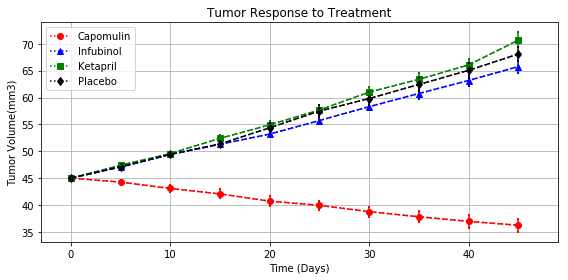

In [19]:
# Generate the Plot (with Error Bars)
# Set the general properties of the chart
plt.figure(figsize=(8,4))
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.grid()
plt.xlim(-3,49)

# Get the data for the x-axis - Time (Days)
x = list(tumor_resp_df.index)

# Define the counter for changing the color and marker of each column
count = 0
colors = ['red','blue','green','black']
markers = ['o', '^', 's', 'd']

# Get the data for the columns 0, 2, 3 and 5 - Capomulin, Infubinol, Ketapril and Placebo, respectively
for col in tumor_resp_df.columns[[0, 2, 3, 5]]:
    # Get the data for y-axis - Tumor Volume (mm3)
    y = tumor_resp_df[col].tolist()
    # Get the data error for the column
    e = list(sem_tumor_vol_df.loc[sem_tumor_vol_df['Drug'] == col,['Tumor Volume (mm3)']].values.flatten())
    # Plot the data error for the column
    plt.errorbar(x, y, yerr=e, ls='--', color=colors[count], capthick=2, capsize=1, ecolor=colors[count])
    # Plot the data
    z, = plt.plot(x, y, color=colors[count], marker=markers[count], label=col, linestyle='dotted')
    count = count + 1

# Set the location of the legend
plt.legend(loc="best")    

# Save the Figure
plt.tight_layout()
plt.savefig("Images/TumorResponse.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = clinical_mouse.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
avg_met_site_df = met_site.to_frame()

# Preview DataFrame
avg_met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site = clinical_mouse.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
sem_met_site_df = met_site.to_frame()

# Preview DataFrame
sem_met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [32]:
# Minor Data Munging to Re-Format the Data Frames
met_resp_df = avg_met_site_df.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
met_resp_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


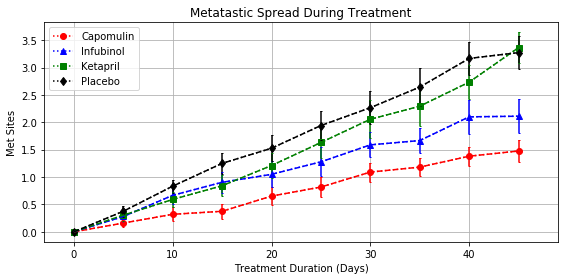

In [18]:
# Generate the Plot (with Error Bars)
# Set the general properties of the chart
plt.figure(figsize=(8,4))
plt.title("Metatastic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.grid()
plt.xlim(-3,49)

# Get the data for the x-axis - Treatment Duration (Days)
x = list(met_resp_df.index)

# Reset the counter for changing the color and marker of each column
count = 0
colors = ['red','blue','green','black']
markers = ['o', '^', 's', 'd']

# Get the data for the columns 0, 2, 3 and 5, Capomulin, Infubinol, Ketapril and Placebo, respectively
for col in met_resp_df.columns[[0, 2, 3, 5]]:
    # Get the data for y-axis - Met Sites
    y = met_resp_df[col].tolist()
    # Get the data error for the column
    e = list(sem_met_site_df.loc[col].values.flatten())
    # Plot the data error for the column    
    plt.errorbar(x, y, yerr=e, ls='--', color=colors[count], capthick=1, capsize=1, ecolor=colors[count])
    # Plot the data
    z, = plt.plot(x, y, color=colors[count], marker=markers[count], label=col, linestyle='dotted')
    count = count + 1

# Set the location of the legend
plt.legend(loc="best")    

# Save the Figure
plt.tight_layout()
plt.savefig("Images/MetatasticSpread.png")

# Show the Figure
plt.show()

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = clinical_mouse.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
mouse_count_df = mouse_count.reset_index()
mouse_count_df = mouse_count_df.rename(columns={"Mouse ID" : "Mouse Count"})
                    
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [33]:
# Minor Data Munging to Re-Format the Data Frames
surv_rate_df = mouse_count_df.reset_index().pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
surv_rate_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


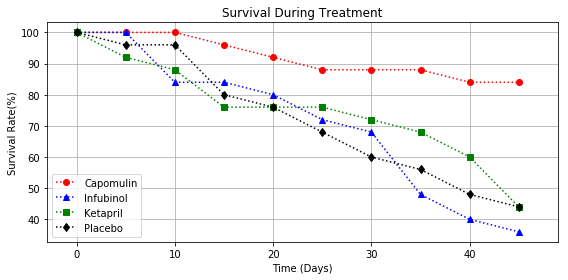

In [23]:
# Generate the Plot (Accounting for percentages)
# Set the general properties of the chart
plt.figure(figsize=(8,4))
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.grid()
plt.xlim(-3,49)

# Get the data for the x-axis - Time (Days)
x = list(surv_rate_df.index)

# Reset the counter for changing the color and marker of each column
count = 0
colors = ['red','blue','green','black']
markers = ['o', '^', 's', 'd']

# Get the data for the columns 0, 2, 3 and 5, Capomulin, Infubinol, Ketapril and Placebo, respectively
for col in surv_rate_df.columns[[0, 2, 3, 5]]:
    # Get the data for y-axis - Survival Rate (%)
    y = ((surv_rate_df[col] / surv_rate_df[col].max()) * 100).tolist()
    # Plot the data    
    z, = plt.plot(x, y, color=colors[count], marker=markers[count], label=col, linestyle='dotted')
    count = count + 1

# Show the legend
plt.legend()

# Save the Figure
plt.tight_layout()
plt.savefig("Images/SurvivalRate.png")

## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug
# last value - First value between the First value   
changes_per = ((tumor_resp_df.loc[tumor_resp_df.index[9]] - \
                tumor_resp_df.loc[tumor_resp_df.index[0]]) / \
               tumor_resp_df.loc[tumor_resp_df.index[0]] * 100)

# Display the data to confirm
changes_per

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [25]:
# Function to label the percentages of changes
# Adaptation of the code found in http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/
def labels(rects,ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)  
        # If we can't fit the label above the column, put it inside.
        if p_height > 0.2: 
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        # Set the text for the bars
        plt.text(rect.get_x() + rect.get_width()/2., label_position,'%d' % int(height) + "%", ha='center', va='bottom', color='white', weight='bold')


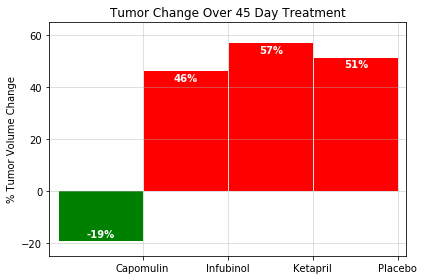

In [29]:
# Store all Relevant Percent Changes into a Tuple
changes_per_tup = tuple(zip(changes_per,changes_per.index))

# Set the general properties of the chart
plt.figure(figsize=(6,4))
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid(alpha=0.5)
plt.ylabel("% Tumor Volume Change")
plt.xlim(-1.1, 3.1)
plt.ylim(-25, 65)

# The first bar must be green, the rest red
colors = ['green','red','red','red']

# Get only the data of the following drugs
only_four = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

tick_locations = []
y_axis = []
for x in changes_per_tup:
    # Get the data for the tick_locations and the y-axis
    if x[1] in only_four:
        tick_locations.append(x[1])
        y_axis.append(x[0])

# Set the intervals for the y-axis ticks
ticks = np.arange(-20, 65, 20)
plt.yticks(ticks)
        
# Assign the plot to an object that we can use in the function to present the labels
rects = plt.bar(tick_locations, y_axis, align="edge", color=colors, width=-0.98)  

# Call the function to present the labels
labels(rects,plt.gca())

# Set the tick_locations for the x-axis
plt.xticks(tick_locations, tick_locations)

# Save the Figure
plt.tight_layout()
plt.savefig("Images/TumorChange.png")

# Show the Figure
plt.show()